In [2]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import matplotlib
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [39]:
#input_spot = int(input())
#input_range = float(input())
input_spot = 100
input_range = 20


np.random.seed(111)
#np.random
var = ['X', 'Y']
labels=['spot0']
for i in range(0,input_spot-1):
    z = 'spot'+str(i+1)
    labels.append(z)

#print(labels)
#X = np.random.random_sample([input_spot,2])*(input_spot*2)
X = (-200) * np.random.random_sample([input_spot,2]) + 200
df = pd.DataFrame(X, columns = var, index = labels)
#df는 점5개의 x,y 좌표를 저장해둠

            spot0       spot1       spot2       spot3      spot4
spot0    0.000000  125.099391   63.493922  128.189732  81.954792
spot1  125.099391    0.000000  127.173800  108.236131  94.919253
spot2   63.493922  127.173800    0.000000   76.920694  39.364018
spot3  128.189732  108.236131   76.920694    0.000000  46.286765
spot4   81.954792   94.919253   39.364018   46.286765   0.000000
          클러스터ID_1  클러스터ID_2        거리  클러스터 멤버수
클러스터 100       5.0      74.0  1.202271       2.0
클러스터 101      64.0      71.0  2.049110       2.0
클러스터 102       8.0      63.0  2.657192       2.0
클러스터 103      22.0      81.0  2.711854       2.0
클러스터 104      14.0     102.0  3.725679       3.0


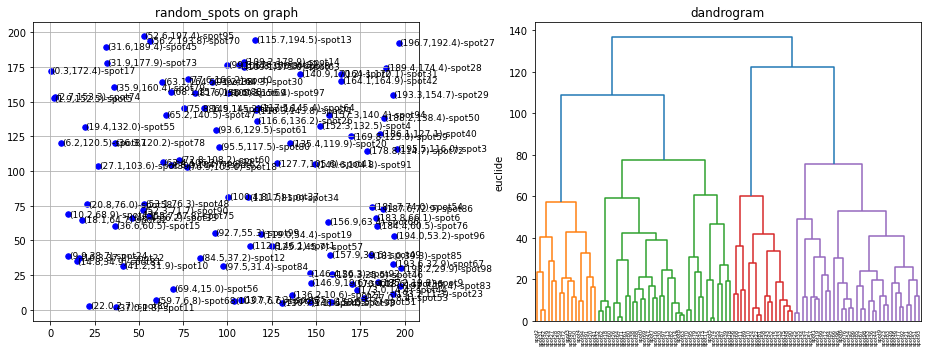

In [40]:
plt.figure(figsize=(13,5))
plt.subplot(121)
plt.title('random_spots on graph')
plt.scatter(X[:,0], X[:,1], c = 'blue', marker = 'o', s = 30)
plt.grid(True)
i=0
for i in range(0,input_spot):
    str_val = "(%.1f,%.1f)-%s"%(X[i,0], X[i,1], labels[i])
    plt.text(X[i,0]+0.5, X[i,1], str_val, fontsize=9, color='black',
             horizontalalignment = 'left', verticalalignment = 'center')


distmatrix = pdist(df, metric = 'euclidean')
row_dist = pd.DataFrame(squareform(distmatrix), columns = labels, index = labels)
#---------------------------------
print_col = row_dist.iloc[:5,:5]
print(print_col)

row_clusters = linkage(distmatrix, method = 'average')

a=pd.DataFrame(row_clusters,
            columns=['클러스터ID_1', '클러스터ID_2', '거리', '클러스터 멤버수'],
            index = ['클러스터 %d' %(i+input_spot) for i in range(row_clusters.shape[0])])
#---------------------------------
print(a[:5])


plt.subplot(122)
plt.title('dandrogram')

row_dendr = dendrogram(row_clusters, labels = labels)
plt.tight_layout()
plt.ylabel('euclide')

#---------------------------------
plt.show()

[28, 24, -1, 5, 30, 2, 8, 12, 31, 19, -1, 15, 16, -1, 31, 7, 12, 2, 33, 24, 13, 3, 34, 19, 34, 38, 32, 4, 4, -1, 22, 36, 29, 7, 26, 38, 1, 26, 14, 6, 5, 13, 36, 21, 1, 25, 9, 12, 7, 9, 5, 23, 21, 1, 35, 10, 18, 24, 21, 17, 33, 20, 29, 31, 32, 3, -1, 11, 18, 28, 37, 32, 17, 25, 2, 7, 27, 9, 6, -1, 20, 34, 31, 19, 16, 11, 35, 10, 14, 15, 7, -1, 9, 23, 30, 37, 8, 22, 11, -1]
[[140.93493912 170.16740857]
 [ 41.2074879   31.88607026]
 [115.73642452 194.51040804]
 [193.32336811 154.71578152]
 [156.8838822   63.43141805]
 [ 35.9429152  160.4369834 ]
 [149.56872264 104.83821211]
 [ 92.71852018  55.29859067]]


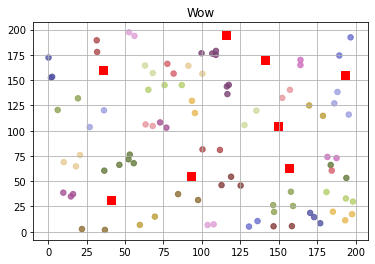

<Figure size 936x360 with 0 Axes>

In [41]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
def found_num(Num, count):
    #print(Num)
    
    if(iHave[Num][3]==0):
        return -1
    
    if(iHave[Num][0] < input_spot):
        #print('왼쪽 마감 ',iHave[Num][0],Num,'번 째 행')
        cluster_done[int(iHave[Num][0])] = count
        iHave[Num][3] = 0
    else: #내부로 더 들어가야함
        Num = int(iHave[Num][0]) - input_spot
        found_num(Num,count)
        
        
    if(iHave[Num][1] < input_spot):
        #print('오른쪽 마감 ',iHave[Num][1],Num,'번 째 행')
        cluster_done[int(iHave[Num][1])] = count
        iHave[Num][3] = 0
    else: #내부로 더 들어가야함
        Num = int(iHave[Num][1]) - input_spot
        found_num(Num,count)
        
    return 0
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


temp=row_clusters.copy()
for i in range(0,input_spot):
    if(temp[i][2]>float(input_range)):
        iHave = temp[:i,:]
        num=i-1
        break

cluster_done = [-1 for _ in range(input_spot)]



count=1
for i in range(num, -1, -1):
    t=found_num(i, count)
    if (t!=-1):
        count+=1

#=====================================================삭제요망
print(cluster_done)

n = 0
check = np.array([])
for i in range(input_spot):
    if(cluster_done[i]==-1):
        check = np.append(check, X[i,:])
        n+=1
        
check = np.reshape(check, (n, 2))
print(check)
#=====================================================삭제요망


plt.title("Wow")
plt.scatter(X[:,0], X[:,1], c=cluster_done, marker = 'o', s=30, cmap='tab20b', alpha = 0.8)
plt.scatter(check[:, 0], check[:, 1], marker = 's', s=60, color = 'red')
plt.grid(True)
plt.figure(figsize=(13,5))

plt.show()

In [42]:
''' #참고 자료
ac = AgglomerativeClustering(5, linkage='average')
ac_clusters = ac.fit_predict(row_dist)
print(ac_clusters)

plt.title("Wine Clusters from Agglomerative Clustering")
plt.scatter(X[:,0], X[:,1], c=ac_clusters, marker = 'o', s=30, cmap='tab20b')
plt.grid(True)
plt.figure(figsize=(13,5))
plt.show()
'''

' #참고 자료\nac = AgglomerativeClustering(5, linkage=\'average\')\nac_clusters = ac.fit_predict(row_dist)\nprint(ac_clusters)\n\nplt.title("Wine Clusters from Agglomerative Clustering")\nplt.scatter(X[:,0], X[:,1], c=ac_clusters, marker = \'o\', s=30, cmap=\'tab20b\')\nplt.grid(True)\nplt.figure(figsize=(13,5))\nplt.show()\n'